1. weighted = 'kernel'

In [4]:
from scanpy import read
from spatial_degs import *
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import scanpy as sc
adata = read('/home/zuolulu/spatialDEG/test/results.h5ad')
#genes = ['CAMK2N1','ENC1','HPCAL1','CCK','HOPX','MALAT1','SERPINE2','TESPA1','RASGRF2','FKBP1A']
## moran'I
#m = moran_i(adata)
#m_filter = m[(m.moran_p_val < 0.05)&(m.moran_q_val<0.05)].sort_values(by=['moran_i'],ascending=False)
#m_filter.to_csv("/home/zuolulu/spatialDEG/test/human_cortex/moran/m_filter.csv")
m_filter = pd.read_csv("/home/zuolulu/spatialDEG/test/human_cortex/moran/m_filter.csv",index_col=0)
genes = m_filter.index.values[1:10]
## plot
color_self = clr.LinearSegmentedColormap.from_list('pink_green', ['#3AB370',"#EAE7CC","#FD1593"], N=256)
for g in genes:
    adata.obs["exp"]=adata.X[:,adata.var.index==g].A
    ax=sc.pl.scatter(adata,alpha=1,x="y_array",y="x_array",color="exp",title=g,color_map=color_self,show=False,size=180000/adata.shape[0])
    ax.set_aspect('equal', 'box')
    ax.axes.invert_yaxis()
    plt.savefig("/home/zuolulu/spatialDEG/test/human_cortex/moran/"+g+".png", dpi=600)
    plt.close()

Moran's I Global Autocorrelation Statistic: 19130it [2:14:57,  2.36it/s]


In [ ]:
m_filter.index.values[1:10]

,moran_i,moran_p_val,moran_q_val,moran_z
MBP,0.820104,0.001,0.005921,197.224305
PLP1,0.740179,0.001,0.005921,177.710885
MOBP,0.677049,0.001,0.005921,154.156660
GFAP,0.658107,0.001,0.005921,156.555171
CNP,0.634707,0.001,0.005921,152.545006
...,...,...,...,...
SPHK1,0.027126,0.002,0.010684,-2.198615
STK32A,0.027030,0.001,0.005921,-2.089981
ZFYVE19,0.026496,0.004,0.019149,-2.672884
IKZF5,0.026082,0.003,0.015146,-2.576451


2. weighted = None

In [3]:
from scanpy import read
from spatial_degs import *
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import scanpy as sc
adata = read('/home/zuolulu/spatialDEG/test/results.h5ad')
#genes = ['CAMK2N1','ENC1','HPCAL1','CCK','HOPX','MALAT1','SERPINE2','TESPA1','RASGRF2','FKBP1A']
## moran'I
m = moran_i(adata,weighted=None)
m_filter = m[(m.moran_p_val < 0.05)&(m.moran_q_val<0.05)].sort_values(by=['moran_i'],ascending=False)
m_filter.to_csv("/home/zuolulu/spatialDEG/test/human_cortex/moran/knn/m_filter.csv")
genes = m_filter.index.values[1:10]
## plot
color_self = clr.LinearSegmentedColormap.from_list('pink_green', ['#3AB370',"#EAE7CC","#FD1593"], N=256)
for g in genes:
    adata.obs["exp"]=adata.X[:,adata.var.index==g].A
    ax=sc.pl.scatter(adata,alpha=1,x="y_array",y="x_array",color="exp",title=g,color_map=color_self,show=False,size=180000/adata.shape[0])
    ax.set_aspect('equal', 'box')
    ax.axes.invert_yaxis()
    plt.savefig("/home/zuolulu/spatialDEG/test/human_cortex/moran/knn/"+g+".png", dpi=600)
    plt.close()

Moran's I Global Autocorrelation Statistic: 19130it [1:11:47,  4.44it/s]


In [4]:
m_filter

,moran_i,moran_p_val,moran_q_val,moran_z
MBP,0.823473,0.001,0.010663,79.969417
PLP1,0.741684,0.001,0.010663,73.761607
SCGB2A2,0.682872,0.001,0.010663,65.835302
GFAP,0.680409,0.001,0.010663,70.489331
MOBP,0.674722,0.001,0.010663,68.054429
...,...,...,...,...
PHTF1,-0.026123,0.004,0.032813,-2.563418
ABCF1,-0.026132,0.002,0.018792,-2.547511
SART3,-0.027213,0.004,0.032813,-2.618395
ZCCHC10,-0.027235,0.003,0.026063,-2.592523


3. cluster morans'I

Trying to set attribute `.obs` of view, copying.


[<Axes:title={'center':'FAM209B'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'CASP8'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'NDST1-AS1'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'TP73'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'MGP'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'SCGB1D2'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'ABCC11'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'IGKC'}, xlabel='y_array', ylabel='x_array'>,
 <Axes:title={'center':'SAA1'}, xlabel='y_array', ylabel='x_array'>]

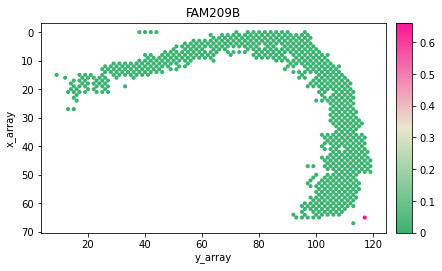

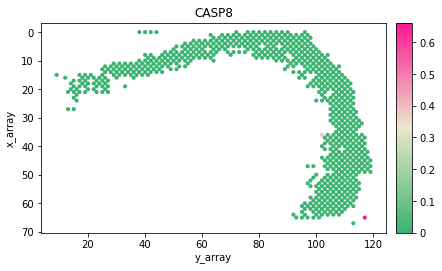

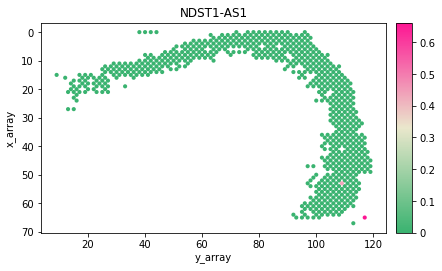

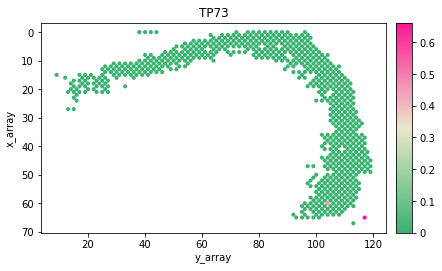

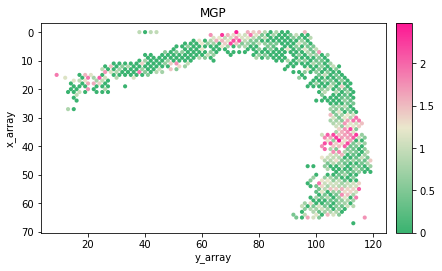

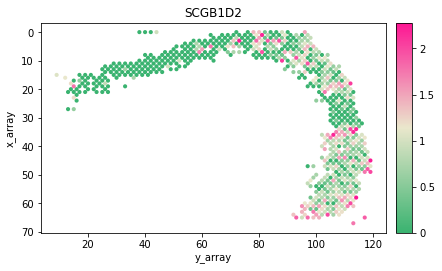

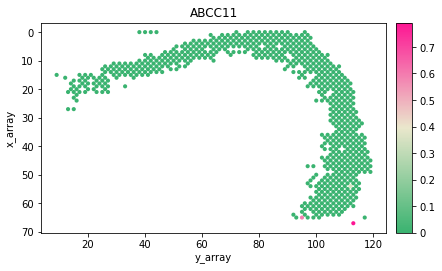

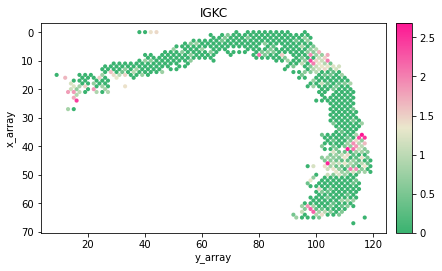

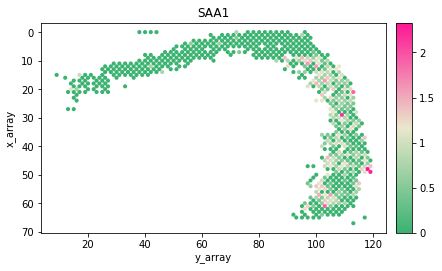

In [13]:
from scanpy import read
from spatial_degs import *
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import scanpy as sc
adata = read('/home/zuolulu/spatialDEG/test/results.h5ad')
## subset cluster
adata = adata[adata.obs['group']==0,:]
## moran'I
m = moran_i(adata)
m_filter = m[(m.moran_p_val < 0.05)&(m.moran_q_val<0.05)].sort_values(by=['moran_i'],ascending=False)
m_filter.to_csv("/home/zuolulu/spatialDEG/test/human_cortex/moran/cluster0/m_filter.csv")
genes = m_filter.index.values[1:10]
## plot
color_self = clr.LinearSegmentedColormap.from_list('pink_green', ['#3AB370',"#EAE7CC","#FD1593"], N=256)
color_self = clr.LinearSegmentedColormap.from_list('pink_green', ['#3AB370',"#EAE7CC","#FD1593"], N=256)
ax = [None]*len(genes)
for i,g in enumerate(genes):
    adata.obs["exp"]=adata.X[:,adata.var.index==g].A
    ax[i]=sc.pl.scatter(adata,alpha=1,x="y_array",y="x_array",color="exp",title=g,color_map=color_self,show=False,size=50000/adata.shape[0])
    ax[i].set_aspect('equal', 'box')
    ax[i].axes.invert_yaxis()
ax
    

In [16]:
genes = m_filter.index.values[-10:-1]
genes

array(['BRWD1-AS2', 'IGSF5', 'PLAC4', 'RIPK4', 'UMODL1', 'LINC01679',
       'TRPM2-AS', 'LRRC3', 'PICSAR'], dtype=object)